In [1]:
#imports
import shap
import pandas as pd
import xgboost as xgb
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [2]:

CONSTRAINT = 0.3

def bars(shap_values):
    # summarize the SHAP values for each feature
    shap.summary_plot(shap_values, X, plot_type='bar', show=False)

    # plot the SHAP values for each feature
    fig, ax = plt.gcf(), plt.gca()
    ax.set_xlim(-0.5, 2)
    ax.set_title("Food Group Impact")
    plt.show()


In [3]:
# select user input
user_input = int(input("Which user's result do you want to look at?: "))

# read the dataframe
data = pd.read_csv('data.csv')
df = data[data['user_number'] == user_input]

# drop all Null data (filtering null values)
df.dropna()

Which user's result do you want to look at?: 24


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,symptom_value,user_number
556,2,0,15,0,41,0,5,11,39,5,...,19,10,8,0,9,3,5,28,10.875690,24
557,4,9,0,2,37,10,8,40,44,11,...,0,15,6,10,25,4,8,18,0.000000,24
558,0,7,0,0,46,12,1,31,41,12,...,0,13,13,0,15,0,16,15,0.295267,24
559,4,11,8,1,36,16,0,37,52,0,...,18,11,9,17,29,0,9,21,13.479929,24
560,0,10,0,0,23,0,3,33,50,7,...,19,11,15,14,14,0,0,16,6.223515,24
561,6,15,0,0,18,12,3,32,43,0,...,16,16,10,15,28,4,8,18,11.140630,24
562,0,17,7,3,36,12,3,36,45,3,...,21,0,9,0,25,0,8,12,0.000000,24
563,4,13,12,3,15,15,6,17,37,0,...,0,16,0,9,25,3,0,36,0.000000,24
564,7,13,0,3,3,15,3,34,49,0,...,13,15,0,12,33,1,0,23,0.000000,24
565,0,16,7,2,21,13,2,29,41,4,...,0,12,8,14,24,1,8,24,0.000000,24


In [4]:
# feature seletion to determine correllation between the colummn and symtpom val
# using corrwidth to compare all values of columns F1-F20 to the symptom_value
# for each data point. Using method - "Spearman Correlation"
correlation = df.iloc[:,:-2].corrwith(df['symptom_value'],method='spearman').abs()
# filtering all food categories with vorrelation value >0.3 and indexing to get names from df header
high_corr_categories = correlation[correlation>CONSTRAINT].index.tolist()

# print the dataframe
df2 = df[high_corr_categories]
df2 = df2.join(df.iloc[:,-2:])
print("Highest affecting food group categories:", high_corr_categories)
print(df2)

Highest affecting food group categories: ['F3', 'F5', 'F12', 'F16', 'F20']
     F3  F5  F12  F16  F20  symptom_value  user_number
556  15  41    9    0   28      10.875690           24
557   0  37   11   10   18       0.000000           24
558   0  46   12    0   15       0.295267           24
559   8  36   10   17   21      13.479929           24
560   0  23   10   14   16       6.223515           24
561   0  18    0   15   18      11.140630           24
562   7  36    0    0   12       0.000000           24
563  12  15    0    9   36       0.000000           24
564   0   3    0   12   23       0.000000           24
565   7  21   13   14   24       0.000000           24
566  12  53    0    0   14       6.008851           24
567   2  14    0    0   22       0.000000           24
568   7  45    6    9   26       5.062169           24
569  10  40    0   14   35       9.134474           24
570  11  50    0   13   28      11.763835           24
571   0  30   17    0    5       0.000000    

In [5]:
# split the dataset into training and test data
X = df.iloc[:,:-2]
y = df["symptom_value"]

In [6]:
# split the dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# create a DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)

In [8]:
# specify XGBoost parameters
params = {'max_depth': 3, 'eta': 0.1, 'objective': 'reg:squarederror'}

# train the model
model = xgb.train(params, dtrain)

In [9]:
# make predictions on the test set
y_pred = model.predict(xgb.DMatrix(X_test))

# calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: 0.1671261311254285


In [10]:
# create an explainer object for SHAP
explainer = shap.Explainer(model, X)

In [11]:

# calculate SHAP values for each feature for each instance
shap_values = explainer(X)

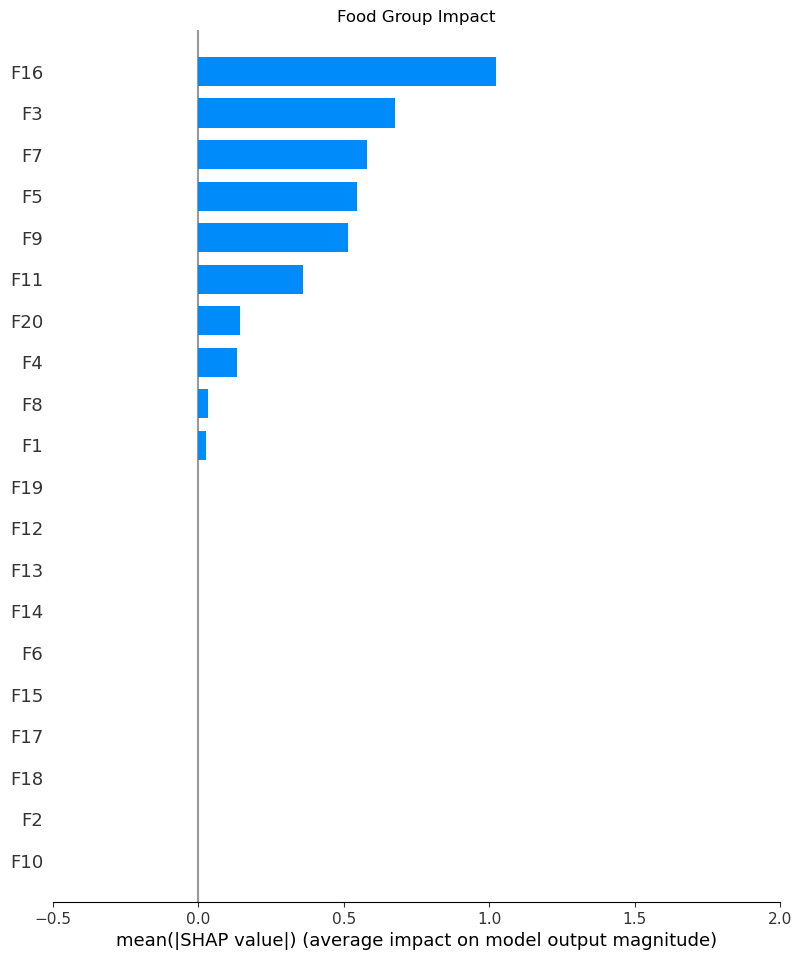

In [12]:
# call the bars() function
bars(shap_values)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


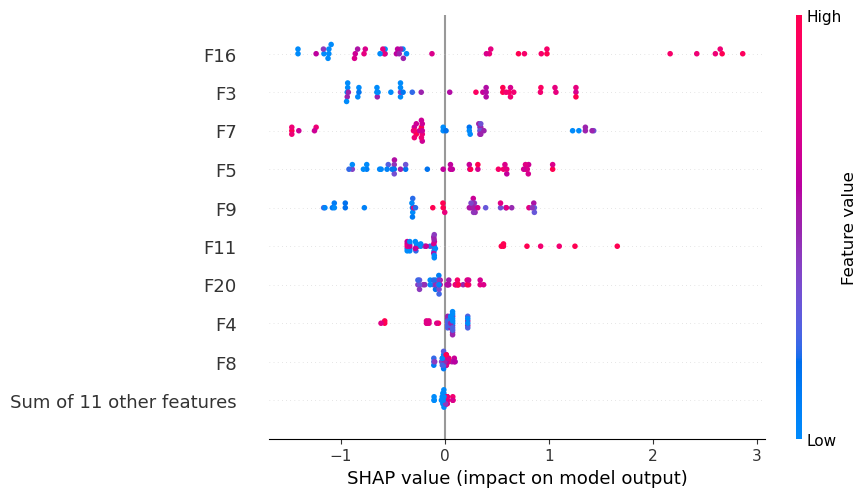

In [13]:
# plot the heatmap
shap.plots.beeswarm(shap_values)